# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-13 (53일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 이번에는 CA 문석의 이론과 실습을 설명하고, 다음에 다시 예제를 푸는 형식으로 할 예정입니다.
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/120-correspondence-analysis-theory-and-practice/

이번에는 [전편](http://localhost:8888/notebooks/PART04/23-95%25%20R로%20분석%20다시보기-2-treat-4-선형대수기초-대응분석관련-12.ipynb) 에 계속 해서 진행 합니다.

전편에서는 집안일과 부부의 역활에 관련해서 교차표를 만들고 이에 관련된 교차표 상의 가로, 세로 변수를 구했습니다. 그리고 카이제곱 통계량을 구했습니다.  

이번에는 카이제곱 통계량 관련에서 교차표 상에 어떤 항목이 영향을 주는지 살펴 보도록 하겠습니다.

## 요구 패키지 들
FactorMineR : CA 계산 패키지
factoextra  : 결과를 출력 그래프로 표시

In [1]:
#install.packages("FactoMineR")
#install.packages("factoextra")

In [4]:
# 패키지 로드
library(FactoMineR)
library(factoextra)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


데모 데이터로 housetasks 를 사용합니다. 
* row 는 여러 집안일들을 나타내고
* column 은 누가 일을 한것인지 표시합니다. (아내, 남편, 공동, 위탁) 으로 구분합니다.
* 각 셀의 값은 빈도수를 나타냅니다.

In [5]:
# data 준비 housetasks 는 factoextra 에 포함된 데이터 입니다.
data(housetasks)

In [6]:
#head(housetasks) 교차표를 보면 다음과 같습니다.
housetasks

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Finances,13,13,21,66


데이터 내용을 보면
* Main_Meal, 세탁, 저녁 등은 주부가 주로 담당합니다.
* 수리 는 남편이 주로 담당합니다.
* 휴일은 부부 공동 담당합니다.

먼저 전편하고 연결을 의해서 카이제곱 검정을 먼저 실시합니다.

### 카이제곱 검정 (Chi-square test)

**카이제곱 검정** 은 교차표에서 통계적으로 유의한 관계가 있는지를 검정 하는 기법입니다.
* 영가설(귀무가설) $(H_0)$ : 교차표에서 가로, 세로 변수가 독립적이다.
* 대립가설 : $(H_1)$ : 가로 세로 변수가 종속적이다.

따라서 영가설 가정하에, 교차표 각 항목에 예상 값을 계산합니다. 예상값은 다음과 같이 계산합니다.

$$
e = \dfrac{row.sum * col.sum}{grand.total}
$$

카이제곱 통계량은 
$$
\chi^2 = \sum \dfrac{(o - e)^2}{e}
$$

* o : 관측 값
* e : 예측 값


카이제곱 통계량은 유의값 과 자유도 를 이용하여 비교합니다.
* 유의값 p = 0.05
* 자유도 $df = (r - 1)(c -1)$ 입니다.
   * r : 교차표에서 가로줄 곗수
   * c : 교차표에서 세로줄 갯수
   
카이제곱 통계량이 유의값 보다 작으면 교차표의 가로 세로 변수는 서로 독립적이지 않다. 
* 참고로 교차표의 각 셀에서 빈도 값은 5보다는 커야 합니다.

R 에선 카이제곱 검정 함수 chisq.test() 를 제공합니다.

In [7]:
chisq <- chisq.test(housetasks)
chisq


	Pearson's Chi-squared test

data:  housetasks
X-squared = 1944.5, df = 36, p-value < 2.2e-16


이 예에서 보면, 가로 세로 변수는 p-value 가 거의 0 이므로 유의값 0.5 보다 작다. 따라서 집안일과 부부역활은 매우 밀접한 관계가 있다고 할 수 있다.

카이제곱 통계량은 1944.5 입니다.

관측 과 예측된 값을 살펴보면

In [8]:
chisq$observed

,Wife,Alternating,Husband,Jointly
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3
Finances,13,13,21,66


In [9]:
# 예측값은 
round(chisq$expected, 2)

,Wife,Alternating,Husband,Jointly
Laundry,60.55,25.63,38.45,51.37
Main_meal,52.64,22.28,33.42,44.65
Dinner,37.16,15.73,23.59,31.52
Breakfeast,48.17,20.39,30.58,40.86
Tidying,41.97,17.77,26.65,35.61
Dishes,38.88,16.46,24.69,32.98
Shopping,41.28,17.48,26.22,35.02
Official,33.03,13.98,20.97,28.02
Driving,47.82,20.24,30.37,40.57
Finances,38.88,16.46,24.69,32.98


카이제곱 통계량은 1944.5 이다. 그러면 **교차표상의 어떤 항목들이 카이제곱 통계량에 영향을 많이 줄까?**  

## 피어슨 표준잔차 (Pearson Residuals: r) 

피어슨 표준잔차 는 이전 에 Z 로 정의한 그 변수 입니다.

$$
r = \dfrac{o - e}{\sqrt{e}}
$$

* o: 관측 값
* e: 예측 값

피어슨 표준잔차는 chisq.test() 에서 쉽게 구해집니다.


In [10]:
round(chisq$residuals, 3)

,Wife,Alternating,Husband,Jointly
Laundry,12.266,-2.298,-5.878,-6.609
Main_meal,9.836,-0.484,-4.917,-6.084
Dinner,6.537,-1.192,-3.416,-3.299
Breakfeast,4.875,3.457,-2.818,-5.297
Tidying,1.702,-1.606,-4.969,3.585
Dishes,-1.103,1.859,-4.163,3.486
Shopping,-1.289,1.321,-3.362,3.376
Official,-3.659,8.563,0.443,-2.459
Driving,-5.469,6.836,8.100,-5.898
Finances,-4.150,-0.852,-0.742,5.750


피어슨 표준잔차를 그래프로 표시하면 다음과 같습니다.

In [11]:
library(corrplot)

corrplot 0.84 loaded


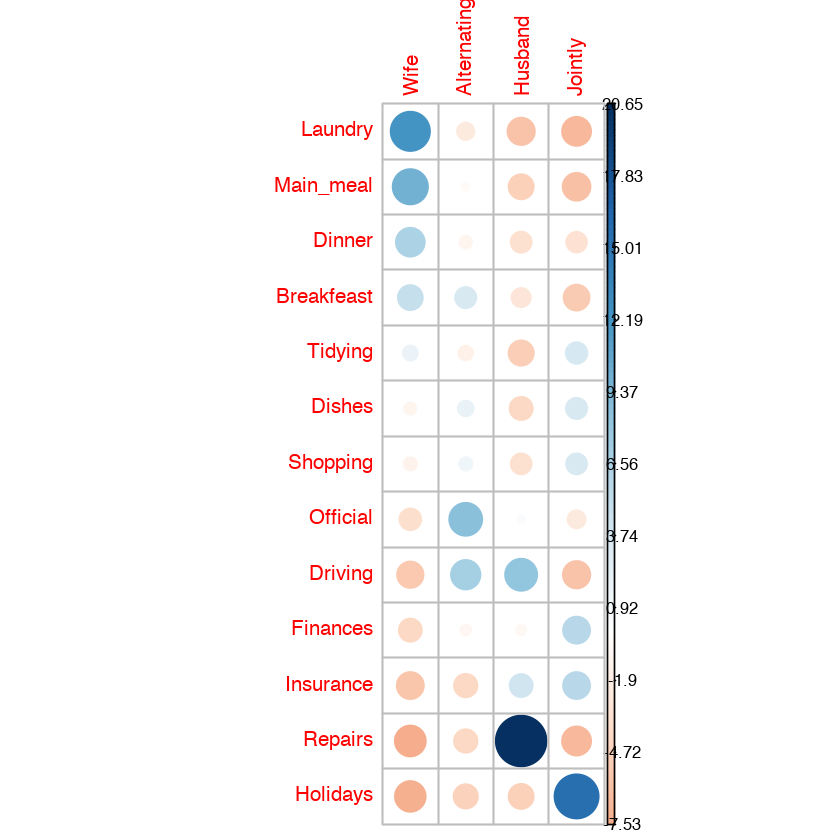

In [12]:
corrplot(chisq$residuals, is.corr = F)

원의 크기는 각 셀이 기여하는 크기를 나타냅니다.

표준잔차에서 기호 (+,-)는 가로항목과 세로항목의 관계를 설명하는데 중요합니다.
1. 양 표준잔차는 푸른색으로 표시합니다. 대응되는 가로, 세로 변수 사이 양의 관계를 갖습니다.
   * 위의 예에서 보면 주부입장의 세탁(Laundry) 과 주식 Main_meal 관계를 보면 알 수 있습니다.
   * 남편과 수리 사이에 강한 관계가 있습니다.
2. 음 표준잔차 는 붉은 색으로 표시 합니다.
   * 이것은 음의 관계를 표시하는데 밀치는 힘을 표시합니다.
   * 주부 항목에서 수리를 보면 음의 관계가 나타납니다. 
   * 남편에서 보면 세탁과 주식에서 강한 음의 관계가 있습니다.
   
대응분석은 표준잔차의 SVD 를 수행하는 기법입니다. 이제 이것에 관해서 설명하고자 합니다.

교차표 상의 각 항목의 전 카이제곱 점수에 관한 공헌 또는 지지도는 다음과 같이 정의 합니다.

$$
contrib = \dfrac{r^2}{\chi^2}
$$


r 은 각 항목의 표준잔차입니다.

In [14]:
# contribute in percent(%)

contrib <- 100 * chisq$residuals^2 / chisq$statistic
round(contrib, 3)

,Wife,Alternating,Husband,Jointly
Laundry,7.738,0.272,1.777,2.246
Main_meal,4.976,0.012,1.243,1.903
Dinner,2.197,0.073,0.600,0.560
Breakfeast,1.222,0.615,0.408,1.443
Tidying,0.149,0.133,1.270,0.661
Dishes,0.063,0.178,0.891,0.625
Shopping,0.085,0.090,0.581,0.586
Official,0.688,3.771,0.010,0.311
Driving,1.538,2.403,3.374,1.789
Finances,0.886,0.037,0.028,1.700


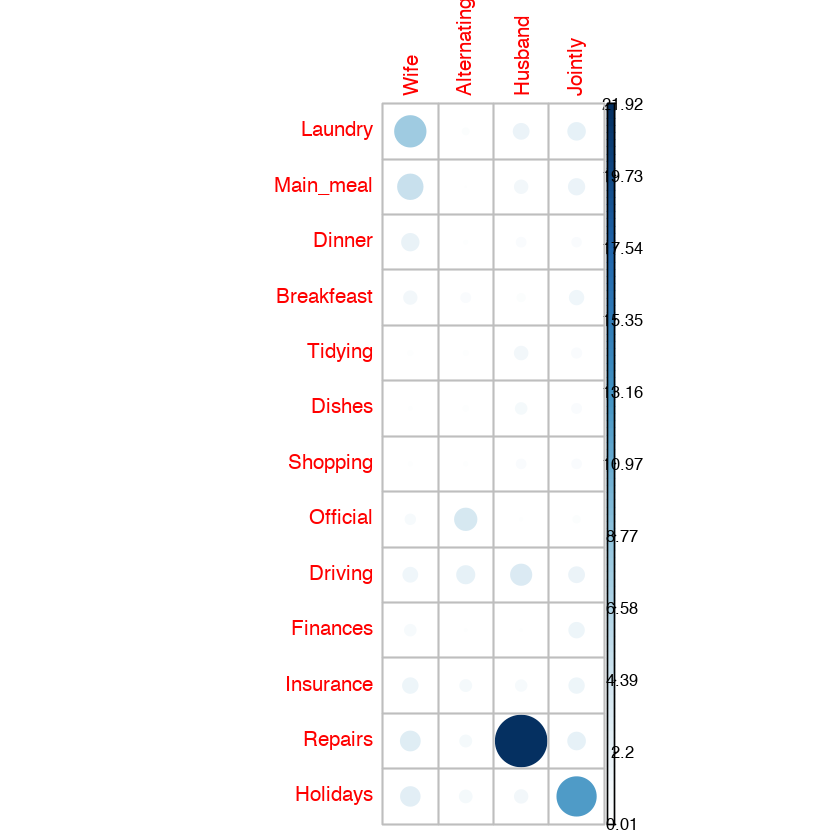

In [15]:
# 이것을 다시 그래프로 표현해서 살펴보면
corrplot(contrib, is.corr = F)

각 셀의 카이제곱 점수에 대한 상대 공헌도는  교차표에서 가로, 세로 변수의 종속을 나타냅니다. 그래프에서 보면
1. 주부 세로줄에서 Laundry, Main_meal, Dinner 가 강하게 나타납니다.
2. 남편 세로줄에서 수리 가 강하게 나타납니다.
3. 공통 세로줄에서 휴일이 강하게 나타납니다.

위 그래프에서 보면 카이제곱에 가장 기여를 하는 항목은 주부/세탁 (7.74%), 주부/주식(4.98%), 남편/수리(21.9%), 공통/휴일(12.44%) 입니다.  

이런 항목은 모두 47.06% 정도 기여하고, 관측과 예측값을 구분하게 되는 가장 큰 이유입니다.

교차표가 매우 큰 경우에는 그래프 상으로 이런것을 한눈에 파악하기 어려우나, 이런 방식이면 쉽게 공헌도를 쉽게 파악하기 쉽게 됩니다.

### 총 관성모멘트 (Total Inertia)

총 관성모멘트 는 데이터 테이블에 포함된 전체의 정보를 나타냅니다. 이것은 파이제곱으로 표시합니다.

$$
\phi^2 = \dfrac{\chi^2}{grand.total}
$$

In [16]:
phi2 <- as.numeric(chisq$statistic/sum(housetasks))
phi2

[1] 1.11494

## 모자이크 그래프

모자이크 그래프는 범주형 변수 사이의 상관관계를 파악하기 위해서 교차표 를 그래프로 표현 한것입니다.
mosaicplot() 함수를 이용합니다.

In [18]:
library(graphics)

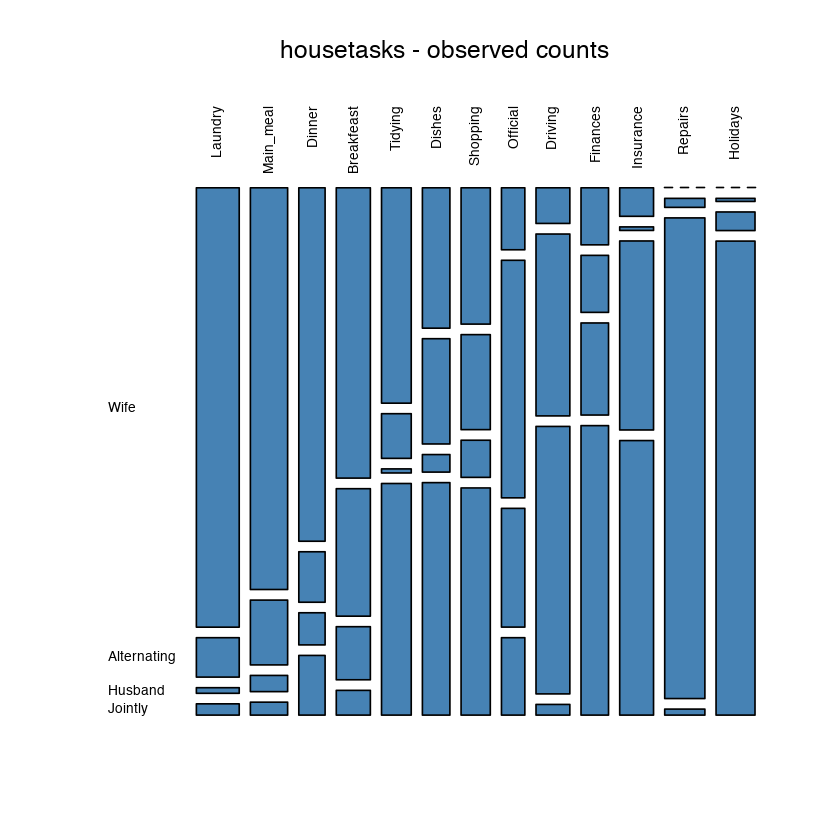

In [22]:
# 관측값의 모자이크 그래프
mosaicplot(housetasks, las = 2, col="steelblue", main="housetasks - observed counts")

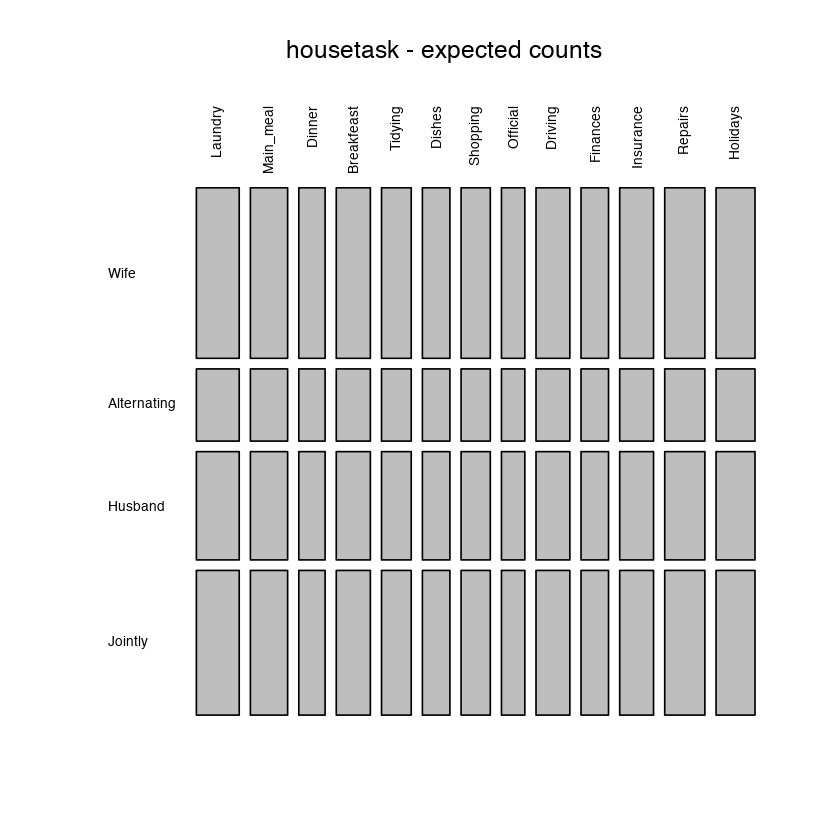

In [23]:
# 에측값에 대한 모자이크 그래프
mosaicplot(chisq$expected, las=2, col="gray", main="housetask - expected counts")

가로 변수를 기준으로 분리(세로줄 분리) 하고, 순서대로 세로 변수를 기준으로 가로줄 분리 합니다. 직사각형의 크기가 관측된 변수의 빈도수를 표시 합니다.

$$
\dfrac{cell.value}{column.sum}
$$

파란색 모자이크는 관측된 값이고 회색 모자이크는 예측한 값입니다.  가로변수와 세로변수가 독립적이면 관측값에 대한 그래프는 회색 모자이크 그래프 처럼 표시 됩니다.

표준잔차에 대한 모자이크 그래프를 그릴수도 있습니다. 이것을 모자이크 그래프에 색을 입혀서 다양한 정보를 표시 할 수 도 있습니다.

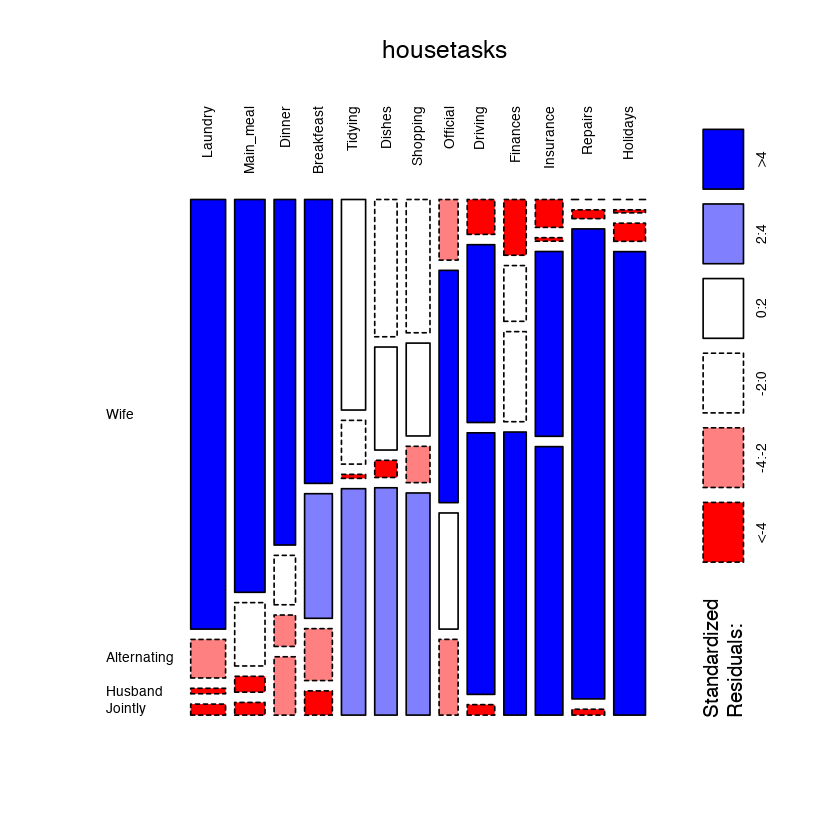

In [25]:
mosaicplot(housetasks, shade = T,  # 그래프의 컬러 표시
          las = 2,                 # 라벨을 수직으로 표시
          main = "housetasks")

다음에는  G-테스트를 잠깐 언급한 후 메인이 대응 분석을 할 예정입니다.